In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("/content/archive (3).zip")
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
data.dropna(inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis = 1)
y = data['median_house_value']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
train_data = X_train.join(y_train)

In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
9615,-120.49,37.28,11.0,1721.0,381.0,1708.0,373.0,1.9535,INLAND,57100.0
8111,-118.20,33.79,48.0,2105.0,592.0,1807.0,539.0,2.7183,NEAR OCEAN,190400.0
11028,-117.84,33.79,37.0,2733.0,460.0,1378.0,476.0,5.3041,<1H OCEAN,235700.0
188,-122.24,37.79,39.0,1469.0,431.0,1464.0,389.0,2.1638,NEAR BAY,105500.0
7759,-118.14,33.91,36.0,1096.0,204.0,569.0,201.0,4.4750,<1H OCEAN,182300.0
...,...,...,...,...,...,...,...,...,...,...
3796,-118.36,34.16,32.0,2455.0,556.0,989.0,493.0,4.0764,<1H OCEAN,325000.0
1154,-121.49,39.52,25.0,848.0,153.0,436.0,155.0,3.9028,INLAND,93800.0
10927,-117.89,33.74,34.0,1759.0,353.0,2083.0,330.0,3.2292,<1H OCEAN,160600.0
19950,-119.34,36.23,12.0,4965.0,872.0,2191.0,804.0,3.5611,INLAND,90200.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

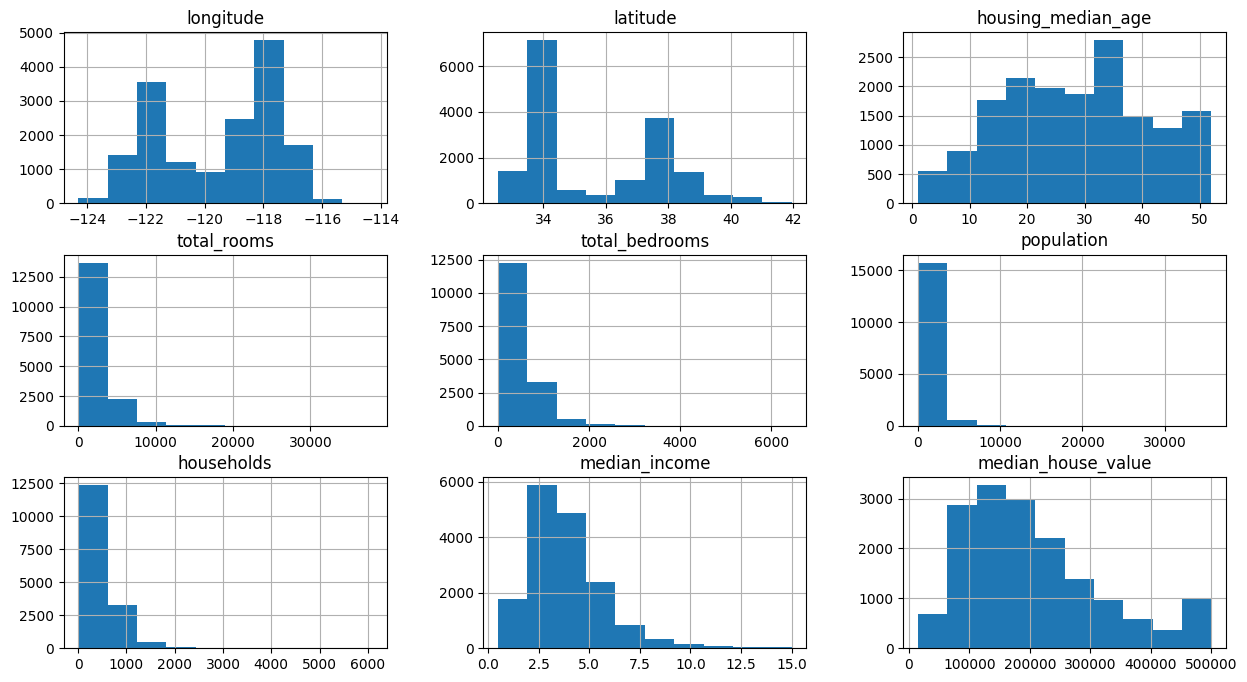

In [ ]:
train_data.hist(figsize=(15,8))

<Axes: >

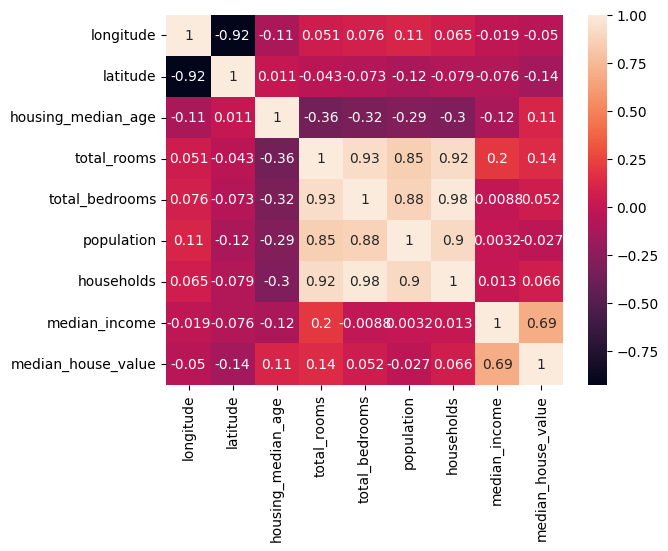

In [ ]:
numeric_columns = train_data.select_dtypes(include=['number'])
sns.heatmap(numeric_columns.corr(), annot=True)

In [ ]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

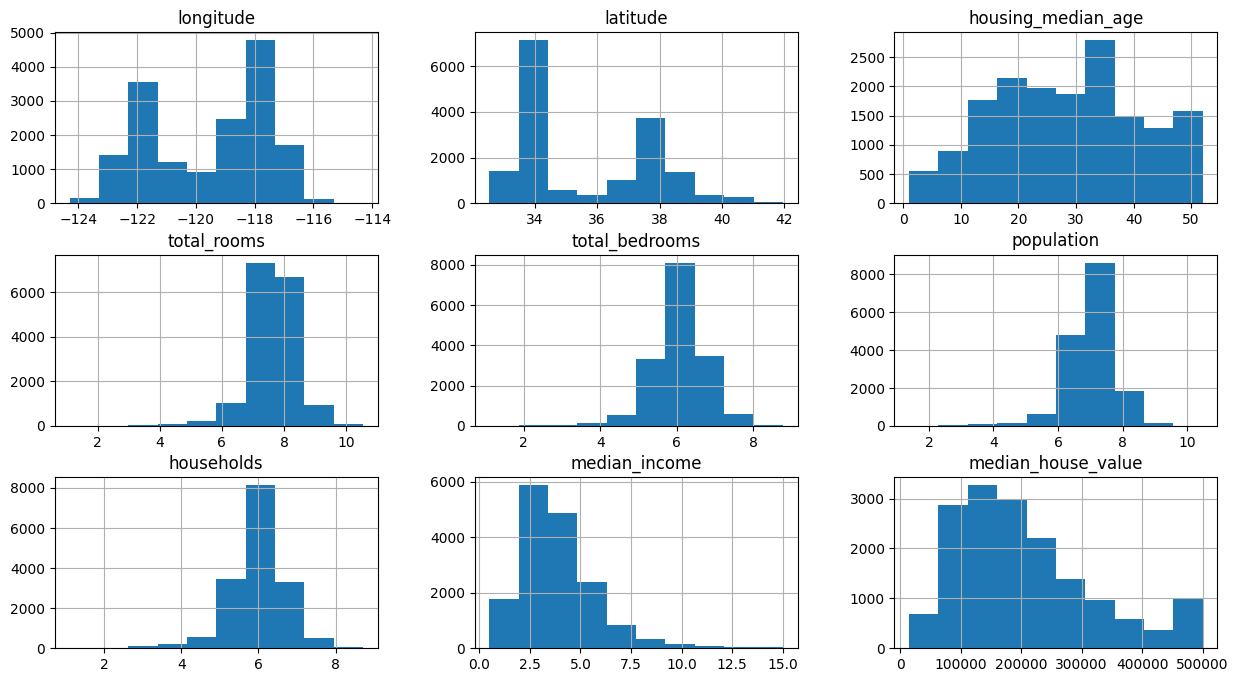

In [ ]:
train_data.hist(figsize=(15,8))

In [ ]:
train_data = train_data.join(pd.get_dummies(train_data['ocean_proximity'])).drop(['ocean_proximity'], axis = 1)

In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
9615,-120.49,37.28,11.0,7.451242,5.945421,7.443664,5.924256,1.9535,57100.0,False,True,False,False,False
8111,-118.20,33.79,48.0,7.652546,6.385194,7.499977,6.291569,2.7183,190400.0,False,False,False,False,True
11028,-117.84,33.79,37.0,7.913521,6.133398,7.229114,6.167516,5.3041,235700.0,True,False,False,False,False
188,-122.24,37.79,39.0,7.293018,6.068426,7.289611,5.966147,2.1638,105500.0,False,False,False,True,False
7759,-118.14,33.91,36.0,7.000334,5.323010,6.345636,5.308268,4.4750,182300.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3796,-118.36,34.16,32.0,7.806289,6.322565,6.897705,6.202536,4.0764,325000.0,True,False,False,False,False
1154,-121.49,39.52,25.0,6.744059,5.036953,6.079933,5.049856,3.9028,93800.0,False,True,False,False,False
10927,-117.89,33.74,34.0,7.473069,5.869297,7.642044,5.802118,3.2292,160600.0,True,False,False,False,False
19950,-119.34,36.23,12.0,8.510370,6.771936,7.692570,6.690842,3.5611,90200.0,False,True,False,False,False


<Axes: >

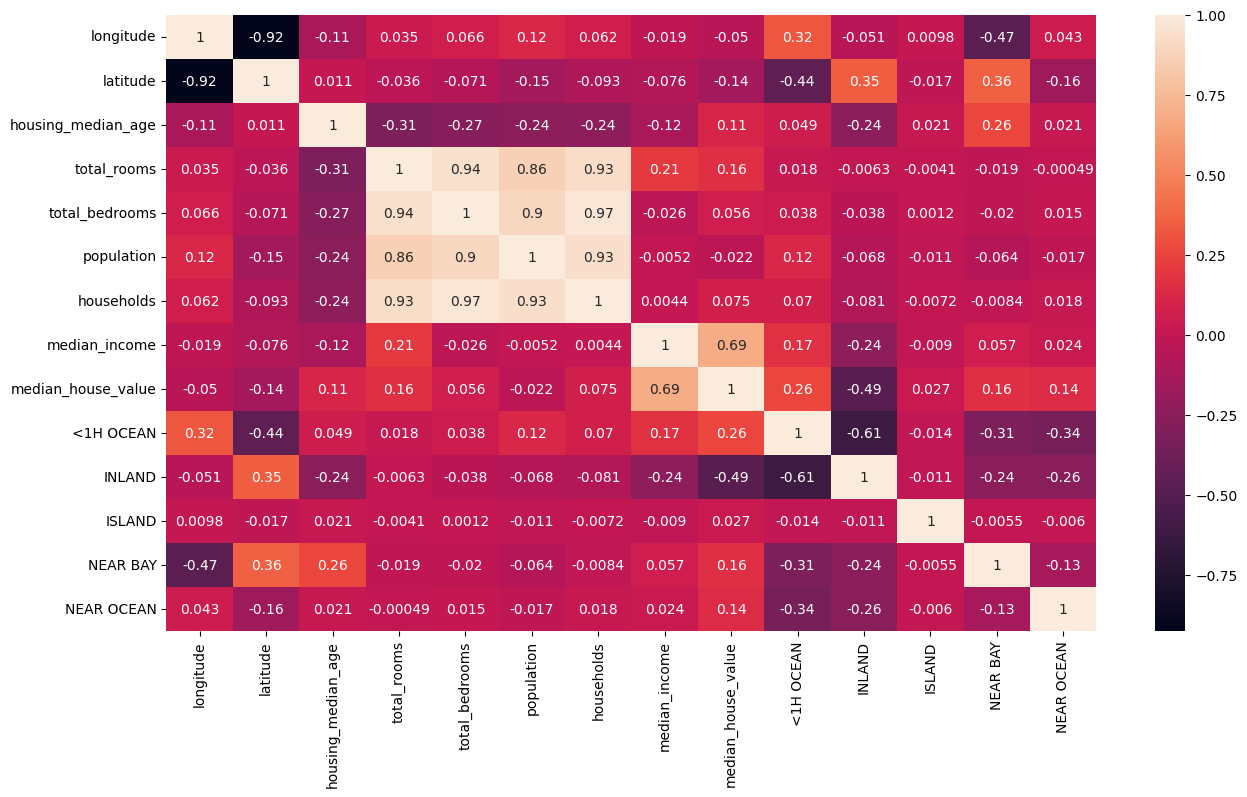

In [ ]:
plt.figure(figsize=(15,8))
numeric_and_bool_columns = train_data.select_dtypes(include=['number', 'bool'])
sns.heatmap(numeric_and_bool_columns.corr(), annot=True)

<Axes: xlabel='latitude', ylabel='longitude'>

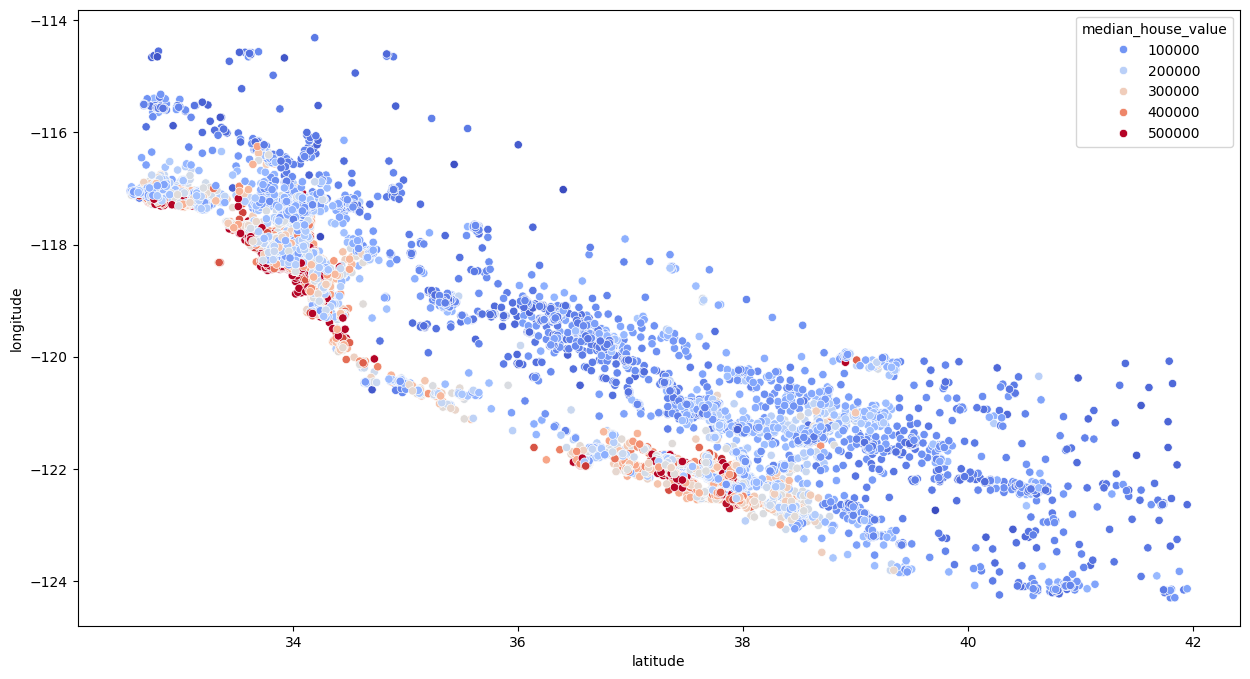

In [ ]:
plt.figure(figsize = (15, 8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

In [ ]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

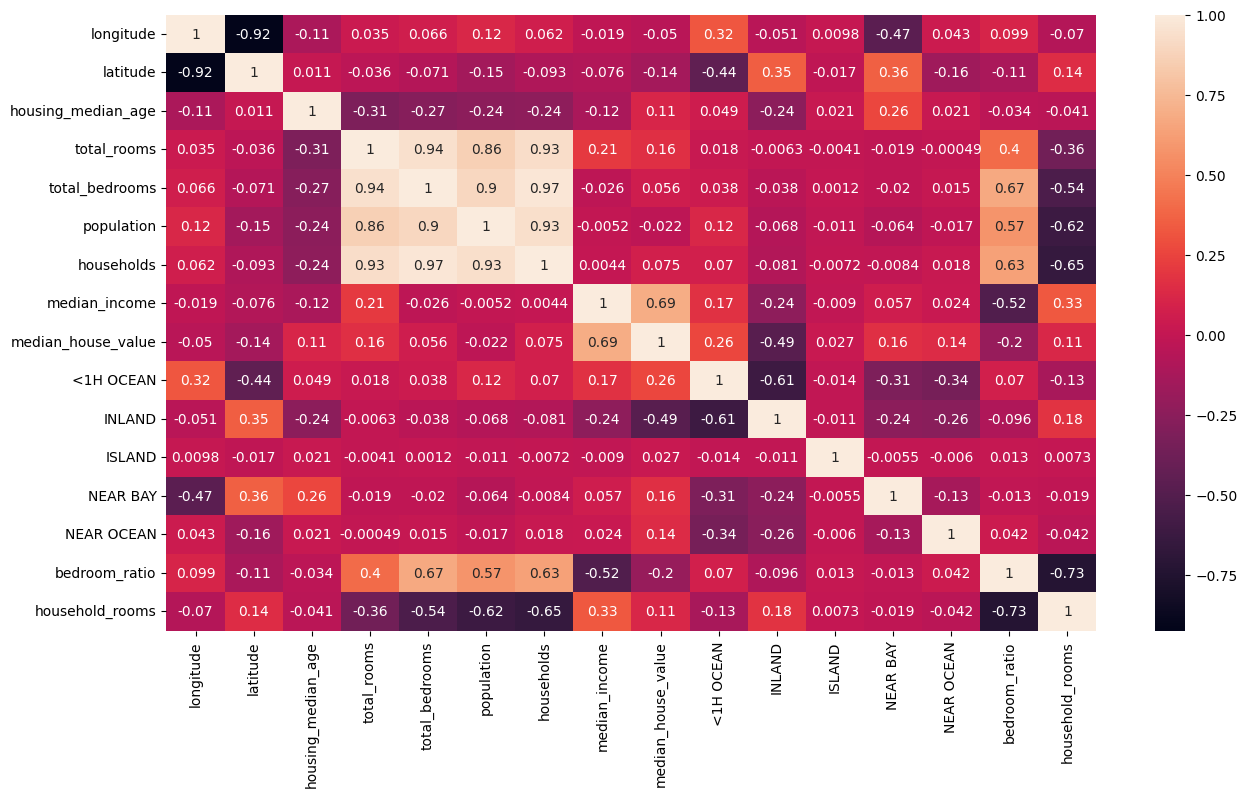

In [ ]:
plt.figure(figsize=(15,8))
numeric_and_bool_columns = train_data.select_dtypes(include=['number', 'bool'])
sns.heatmap(numeric_and_bool_columns.corr(), annot=True)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train_s, y_train)

LinearRegression()

In [ ]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data['ocean_proximity'])).drop(['ocean_proximity'], axis = 1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [ ]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [ ]:
X_test_s = scaler.transform(X_test)

In [ ]:
reg.score(X_test_s, y_test)

0.6603521324532808

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train_s, y_train)

RandomForestRegressor()

In [ ]:
forest.score(X_test_s, y_test)

0.8121042282970736

In [ ]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [100, 200, 300],
    "min_samples_split": [2,4],
    "max_depth": [None, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True
                           )

grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(n_estimators=300)

In [ ]:
best_forest = grid_search.best_estimator_

In [ ]:
best_forest.score(X_test_s, y_test)

0.814078925714812